# Аналитика данных компании Gectaro
## Ссылка на презентацию
* [Презентация](https://disk.yandex.ru/i/_dqrqVHyiqqEyg)
## Описание проекта
Цель проекта - проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации. Для этого предлагается определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.
## План работы
1. Загрузка данных.
2. Предобработка данных
3. Исследовательский анализ.
4. Проверка гипотез и поиск признаков оттока.
5. Выводы.
6. Презентация.
## Выполнила
Ташланова Анна

Telegram: @AnnaTashlan

## Загрузка данных.
Загрузим данные из файлов и посмотрим на них.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats as st

In [2]:
activities = pd.read_csv('C:/Users/atash/Карьерный_трек/Мастерская/Gectaro/datasets/activities.csv', parse_dates=['month'], dayfirst=True)
billing = pd.read_csv('C:/Users/atash/Карьерный_трек/Мастерская/Gectaro/datasets/billing.csv', index_col=0)
companies = pd.read_csv('C:/Users/atash/Карьерный_трек/Мастерская/Gectaro/datasets/companies.csv')
people = pd.read_csv('C:/Users/atash/Карьерный_трек/Мастерская/Gectaro/datasets/people.csv')

In [3]:
activities.head()

,Unnamed: 0,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,0,1,2019-01-09 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,1,2019-01-12 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,2,1,2020-01-04 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,3,1,2020-01-07 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0


In [4]:
billing.head()

,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
4,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
6,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
16,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
18,18,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
24,24,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09


In [5]:
companies.head()

,Unnamed: 0,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,19,514,-,1.0,1571316635,1670298314,4.0,True
1,57,383,Строительство,2.0,1564142565,1676550050,7.0,False
2,69,495,-,1.0,1570535695,1598281714,2.0,False
3,75,724,-,1.0,1579514393,1670298294,4.0,True
4,99,471,-,1.0,1569328017,1670298360,7.0,True


In [6]:
people.head()

,Unnamed: 0,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,2,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
1,6,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
2,7,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
3,10,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
4,17,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09


In [7]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Unnamed: 0                     6316 non-null   int64              
 1   company_id                     6316 non-null   int64              
 2   month                          6316 non-null   datetime64[ns, UTC]
 3   company-month-billing          6316 non-null   float64            
 4   company-month-stocks           6316 non-null   float64            
 5   company-month-backups          6316 non-null   float64            
 6   company-month-projects         6316 non-null   float64            
 7   company-month-contractors      6316 non-null   float64            
 8   company-month-resource_orders  6316 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 444.2 KB


In [8]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 4 to 18953
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3480 non-null   int64  
 1   id                       3480 non-null   int64  
 2   user_id                  3480 non-null   int64  
 3   company_id               3480 non-null   int64  
 4   billing_tariff_id        3480 non-null   int64  
 5   payed_until              3480 non-null   int64  
 6   is_payed                 3480 non-null   bool   
 7   created_at               3480 non-null   int64  
 8   updated_at               3480 non-null   int64  
 9   billing_tariff_price_id  3480 non-null   float64
 10  comment                  745 non-null    object 
 11  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage: 329.6+ KB


In [9]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               723 non-null    int64  
 1   id                       723 non-null    int64  
 2   working_direction        720 non-null    object 
 3   employer_count_interval  723 non-null    float64
 4   created_at               723 non-null    int64  
 5   updated_at               723 non-null    int64  
 6   billing_tariff_id        716 non-null    float64
 7   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 40.4+ KB


In [10]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5095 non-null   int64  
 1   id          5095 non-null   int64  
 2   company_id  5095 non-null   int64  
 3   user_id     3813 non-null   float64
 4   role_id     5095 non-null   int64  
 5   created_at  5095 non-null   int64  
 6   updated_at  5095 non-null   int64  
 7   is_deleted  5095 non-null   bool   
 8   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 323.5 KB


У нас есть 4 датасета, которые необходимо предобработать прежде, чем приступать к анализу.

## Предобработка данных.

Приведём названия столбцов к единому формату для удобства использования.

In [11]:
activities.columns = [
    'unnamed_0',
    'company_id',
    'month',
    'company_month_billing',
    'company_month_stocks',
    'company_month_backups',
    'company_month_projects',
    'company_month_contractors',
    'company_month_resource_orders'
]

In [12]:
billing.columns = [
    'unnamed_0',
    'id',
    'user_id',
    'company_id',
    'billing_tariff_id',
    'payed_until',
    'is_payed',
    'created_at',
    'updated_at',
    'billing_tariff_price_id',
    'comment',
    'pay_date'
]

In [13]:
companies.columns = [
    'unnamed_0',
    'id',
    'working_direction',
    'employer_count_interval',
    'created_at',
    'updated_at',
    'billing_tariff_id',
    'billing_is_over'
]

In [14]:
people.columns = [
    'unnamed_0',
    'id',
    'company_id',
    'user_id',
    'role_id',
    'created_at',
    'updated_at',
    'is_deleted',
    'deleted_at'
]

В датасете `activities` в столбце `month` содержатся даты. Приведём данные к соответствующему типу.

In [15]:
activities['month'] = activities['month'].dt.tz_localize(None)

В некоторых столбцах даты находятся в формате unix-время. Приведём их в привычный вид.

In [16]:
billing['payed_until'] = pd.to_datetime(billing['payed_until'], unit='s')
billing['created_at'] = pd.to_datetime(billing['created_at'], unit='s') 
billing['updated_at'] = pd.to_datetime(billing['updated_at'], unit='s')
billing['pay_date'] = pd.to_datetime(billing['pay_date'], unit='s') 
companies['created_at'] = pd.to_datetime(companies['created_at'], unit='s') 
companies['updated_at'] = pd.to_datetime(companies['updated_at'], unit='s')
people['created_at'] = pd.to_datetime(people['created_at'], unit='s') 
people['updated_at'] = pd.to_datetime(people['updated_at'], unit='s') 

Посмотрим на пропуски в данных.

In [17]:
billing.isna().mean()*100

unnamed_0                   0.000000
id                          0.000000
user_id                     0.000000
company_id                  0.000000
billing_tariff_id           0.000000
payed_until                 0.000000
is_payed                    0.000000
created_at                  0.000000
updated_at                  0.000000
billing_tariff_price_id     0.000000
comment                    78.591954
pay_date                   68.160920
dtype: float64

В датасете `billing` значительное количество пропусков в столбцах `comment` (78,6%) и `pay_date` (68,2%). Поле с комментариями может быть необязательным. Очень много пропусков в датах платежей. Вероятно это связано с особенностями ввода данных. У нас нет возможности заполнить эти пропуски, поэтому оставив пропуски без изменений.

In [18]:
companies.isna().mean()*100

unnamed_0                  0.000000
id                         0.000000
working_direction          0.414938
employer_count_interval    0.000000
created_at                 0.000000
updated_at                 0.000000
billing_tariff_id          0.968188
billing_is_over            0.000000
dtype: float64

В датасете `companies` незначительное количество пропусков в столбцах `working_direction` (0,4%) и `billing_tariff_id` (1%). Возможно информацию о сфере деятельности компании заполняет сам пользователь, поэтому в этих данных есть пропуски. Основная информация об ID тарифов находится в датасете с платежами, поэтому эти пропуски можно не трогать.

In [19]:
people.isna().mean()*100

unnamed_0      0.000000
id             0.000000
company_id     0.000000
user_id       25.161923
role_id        0.000000
created_at     0.000000
updated_at     0.000000
is_deleted     0.000000
deleted_at    57.212954
dtype: float64

В датасете `people` значительное количество пропусков в столбцах `user_id` (25%) и `deleted_at` (57%). Вероятно это связано с особенностями ввода данных. Мы не можем заполнить эти пропуски, и, так как эти столбцы для нас не очень важны, оставим пропуски без изменений.

Проверим данные на дубликаты.

In [20]:
print(f"Явных дубликатов в activities: {activities.duplicated().sum()}")
print(f"Явных дубликатов в billing: {billing.duplicated().sum()}")
print(f"Явных дубликатов в companies: {companies.duplicated().sum()}")
print(f"Явных дубликатов в people: {people.duplicated().sum()}")

Явных дубликатов в activities: 0
Явных дубликатов в billing: 0
Явных дубликатов в companies: 0
Явных дубликатов в people: 0


Посмотрим на уникальные значения столбца `working_direction`. 

In [21]:
companies['working_direction'].unique()

array(['-', 'Строительство', 'Генеральный подрядчик',
       'Строительная компания', 'Ремонт помещений', 'строительство ',
       'ремонт и отделка', 'СТРОИТЕЛЬСТВО', 'строительство',
       'Строительство домов', 'телемаркетинг', 'ремонт',
       'Ремонт и отделка помещений', '-Малоэтажное строительство',
       'Отделка ', 'Отделка',
       'Проектирование и строительство ресторанов ',
       'строительство  и отделка', 'ремонты', 'Электромонтажные работы',
       'строительная компания (тест)', 'Строительство и ремонт',
       'Демонтажные работы', 'Строительство рыбоводных ферм',
       'Строительно-монтажные работы', 'Строительство каркасных домов',
       'Дизайн интерьеров', 'Ремонтные работы',
       'Малоэтажное строительство ', nan, 'Ремонтно-строительная ',
       'Ремонт под ключ', 'Электромонтаж',
       'Проектирование,  Производство и Строительство',
       'Строительство коттеджей', 'Строительство загородных домов',
       'Малоэтажное строительство', 'Электроэнергетик

Видимо эту информацию действительно заполняет сам пользователь, и в этом столбце есть неявные дубликаты. Поскольку нет уверенности, что этот столбец будет нам полезен для анализа, пока не будет устранять их.

Проверим, действительно ли данные очищены от компаний, пользующихся пробными, промо и бесплатными тарифами (1, 18, 22).

In [22]:
billing['billing_tariff_id'].unique()

array([ 3,  7,  2,  4, 11,  9, 10,  6, 13, 17, 19, 20, 21], dtype=int64)

Компаний, пользующихся пробными, промо и бесплатными тарифами в данных нет.

Таким образом, на этапе предобработки мы:
- привели названия столбцов к единому формату,
- в столбцах, содержащих даты, откорректировали тип данных,
- проанализировали пропущенные значения, обнаружив, что даты платежей, ID сотрудников и даты их удаления из системы содержат значительное количество пропусков, что вероятно связано с особенностями ввода этих данных,
- проверили данные на дубликаты, обнаружив, что в столбце с информацией о сфере деятельности есть неявные дубликаты,
- убедились, что в данных не содержатся компании, пользующиеся пробными, промо и бесплатными тарифами.

Можем приступать к анализу.

## Исследовательский анализ

В качестве целевой переменной, показывающей значения 'клиент отменил подписку'/'клиент продлил подписку' рассмотрим наиболее позднее значение поля `payed_until` и сравним с датой начала исследования 28.03.2024. Также добавим информацию о последней дате обновления тарифа.

In [23]:
today = pd.Timestamp(2024,3,28)

In [24]:
def categorize_churn(payed_until):
    '''
    Эта функция назначает значения: 'клиент ушёл'/'клиент не ушёл'. 
    На вход принимает наиболее позднее значение поля payed_until.
    '''
    try:
        if payed_until > today: 
            return 0
        elif payed_until <= today: 
            return 1
    except:
        pass

In [25]:
date_max = billing.pivot_table(index='company_id', values=['payed_until', 'updated_at'], aggfunc='max').reset_index()
date_max['churn'] = date_max['payed_until'].apply(categorize_churn)

Теперь, когда у нас есть целевая переменная, соберем важные для анализа данные в один датасет. Для начала объединим во вспомогательный датасет нужные столбцы из платежей с информацией о том, ушел клиент или остался.

In [26]:
billing_date_max = billing.merge(date_max, how='inner', left_on=['company_id', 'payed_until', 'updated_at'], right_on=['company_id', 'payed_until', 'updated_at'])
billing_date_max.drop(['unnamed_0', 'id', 'user_id', 'comment'], axis= 1 , inplace= True ) 
billing_date_max.columns = [
    'company_id', 
    'billing_tariff_id',
    'payed_until',
    'is_payed',
    'billing_created',
    'billing_updated',
    'billing_tariff_price_id',
    'pay_date',
    'churn'
]

Проверим, что в датасет вошли компании с уникальным ID.

In [27]:
billing_date_max['company_id'].nunique()

1683

In [28]:
billing_date_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               1683 non-null   int64         
 1   billing_tariff_id        1683 non-null   int64         
 2   payed_until              1683 non-null   datetime64[ns]
 3   is_payed                 1683 non-null   bool          
 4   billing_created          1683 non-null   datetime64[ns]
 5   billing_updated          1683 non-null   datetime64[ns]
 6   billing_tariff_price_id  1683 non-null   float64       
 7   pay_date                 643 non-null    datetime64[ns]
 8   churn                    1683 non-null   int64         
dtypes: bool(1), datetime64[ns](4), float64(1), int64(3)
memory usage: 107.0 KB


Теперь объединим этот датасет с информацией о компаниях.

In [29]:
billing_companies = companies.merge(billing_date_max, how='inner', left_on='id', right_on='company_id')
billing_companies.drop(['unnamed_0', 'id', 'billing_tariff_id_x', 'working_direction'], axis= 1 , inplace= True ) 
billing_companies.columns = [
    'employer_count_interval',
    'company_created',
    'company_updated',
    'billing_is_over',
    'company_id', 
    'billing_tariff_id',
    'payed_until',
    'is_payed',
    'billing_created',
    'billing_updated',
    'billing_tariff_price_id',
    'pay_date',
    'churn'
]

И сформируем окончательный датасет, объединив эту информацию с активностями.

In [30]:
data = activities.merge(billing_companies, how='inner', left_on='company_id', right_on='company_id')

Построим гистограммы и посмотрим на распределение данных.

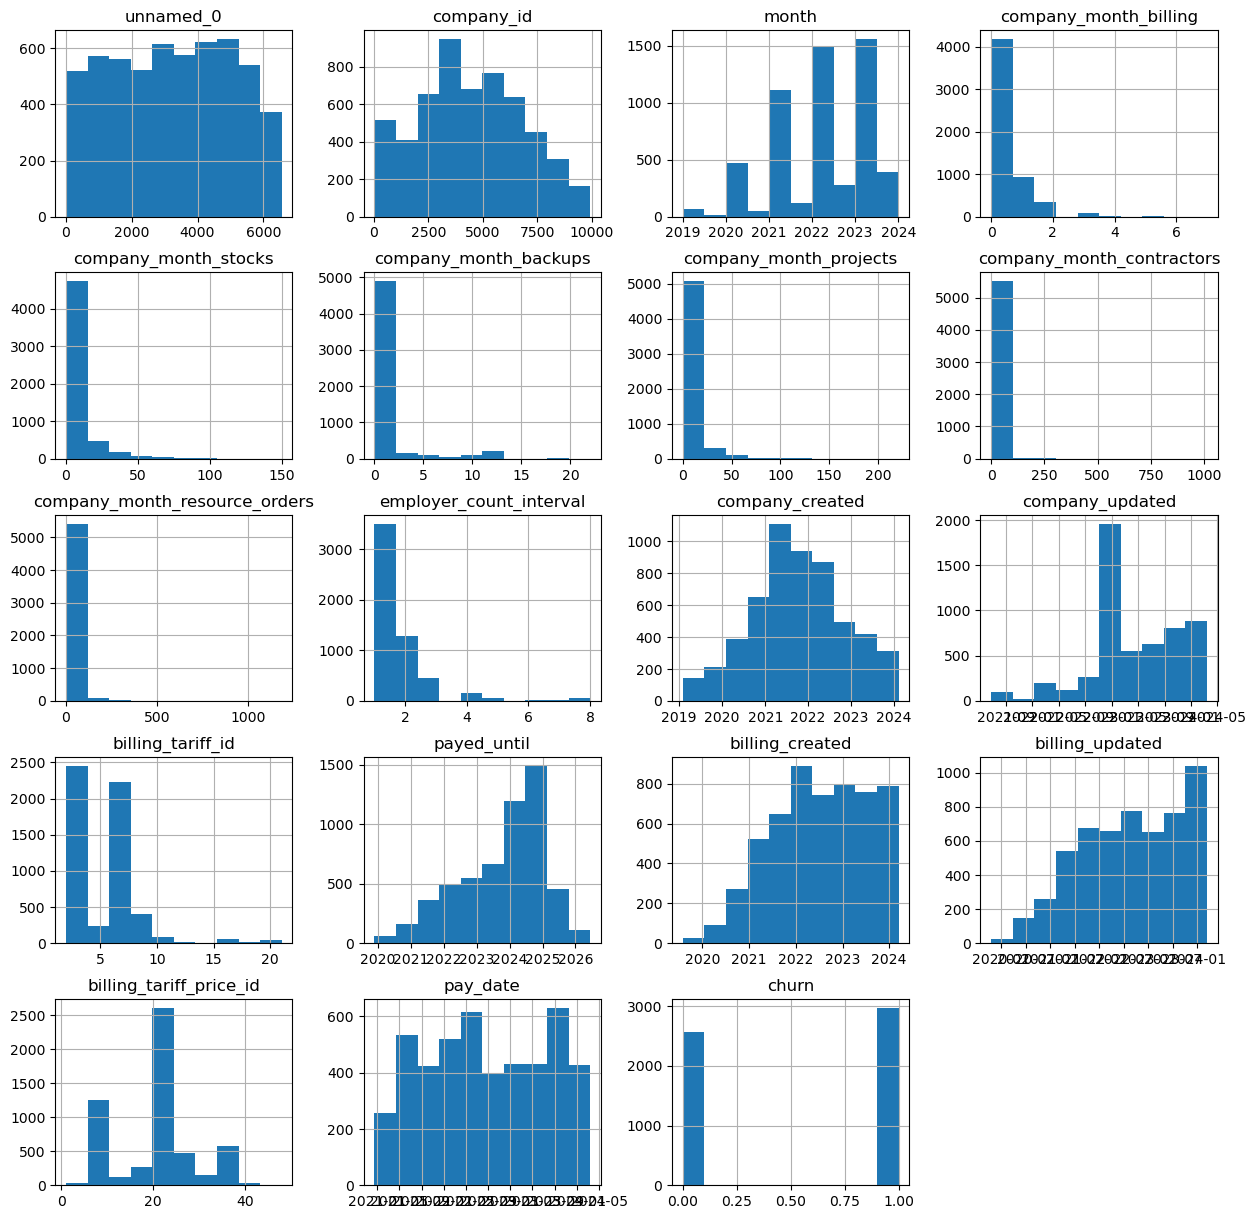

In [31]:
data.hist(bins=10, figsize=(15, 15))
plt.show()

Распределение данных близко к нормальному только в столбцах `payed_until` и `company_created`. Вероятно в данных есть выбросы. Рассмотрим подобнее.

In [32]:
data.describe()

,unnamed_0,company_id,month,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders,employer_count_interval,company_created,company_updated,billing_tariff_id,payed_until,billing_created,billing_updated,billing_tariff_price_id,pay_date,churn
count,5540.000000,5540.000000,5540,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540,5540,5540.000000,5540,5540,5540,5540.000000,4667,5540.000000
mean,3226.086282,4461.561552,2022-01-25 11:13:28.375451136,0.346390,7.413177,1.044404,7.271119,7.909928,10.941336,1.625812,2021-10-09 11:18:51.164440576,2023-04-08 13:52:38.073465600,5.090614,2023-10-15 08:50:48.916425984,2022-07-12 04:13:20.426534400,2022-08-28 00:59:04.520036096,20.982310,2022-08-22 11:06:02.632740608,0.536643
min,4.000000,21.000000,2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2019-01-31 13:03:23,2021-06-25 19:16:44,2.000000,2019-11-26 00:00:00,2019-08-02 05:50:56,2019-10-17 08:31:13,1.000000,2020-12-16 12:43:27,0.000000
25%,1640.750000,2771.000000,2021-01-10 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2021-02-02 09:42:33,2022-12-06 03:45:14,2.000000,2022-11-11 00:00:00,2021-09-23 08:39:04,2021-11-03 14:34:37,14.000000,2021-11-23 08:57:03,0.000000
50%,3257.500000,4351.000000,2022-01-08 00:00:00,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000,1.000000,2021-10-05 11:34:59,2023-03-07 22:00:01,6.000000,2024-02-25 00:00:00,2022-07-15 10:46:54,2022-09-01 06:44:44,23.000000,2022-07-29 00:00:00,1.000000
75%,4754.250000,6254.000000,2023-01-06 00:00:00,0.000000,8.000000,0.000000,7.000000,7.000000,4.000000,2.000000,2022-06-21 10:32:05,2023-10-19 04:06:47,7.000000,2024-10-13 00:00:00,2023-05-17 11:26:18,2023-08-18 06:17:24,24.000000,2023-06-09 00:00:00,1.000000
max,6556.000000,9931.000000,2024-01-03 00:00:00,7.000000,150.000000,22.000000,221.000000,1014.000000,1182.000000,8.000000,2024-02-07 12:56:09,2024-03-13 10:44:24,21.000000,2026-06-12 00:00:00,2024-03-13 10:24:06,2024-03-13 10:26:17,48.000000,2024-03-13 10:26:17,1.000000
std,1801.854214,2374.643671,NaN,0.697697,12.918784,2.967023,13.577157,26.805384,42.502271,1.128606,NaN,NaN,3.330897,NaN,NaN,NaN,8.722314,NaN,0.498701


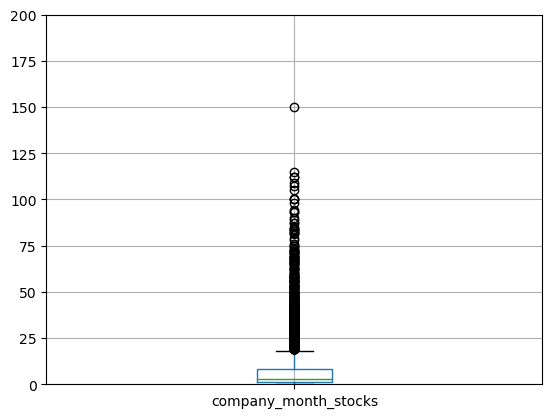

In [33]:
data.boxplot('company_month_stocks')
plt.ylim(0, 200)
plt.show()

In [34]:
np.percentile(data['company_month_stocks'], [90, 95, 99])

array([20., 33., 66.])

Не более чем у 10% пользователей месячное количество складов, используемых компанией, превышает 20, и не более чем у 1% превышает 66.

In [35]:
stocks = data.query('company_month_stocks > 75')

In [36]:
stocks['employer_count_interval'].unique()

array([2., 1., 3.])

При этом, судя по ID количества сотрудников, в компаниях, используемых более 75 складов, работает не более 20 человек. Теоретически это возможно, но вероятно стоит разделить значения этого столбца на категории.

In [37]:
np.percentile(data['company_month_backups'], [90, 95, 99])

array([ 4., 10., 12.])

Не более 10% компаний делают в месяц более 4 бэкапов. Чуть позже посмотрим на какие категории можно разбить эти данные.

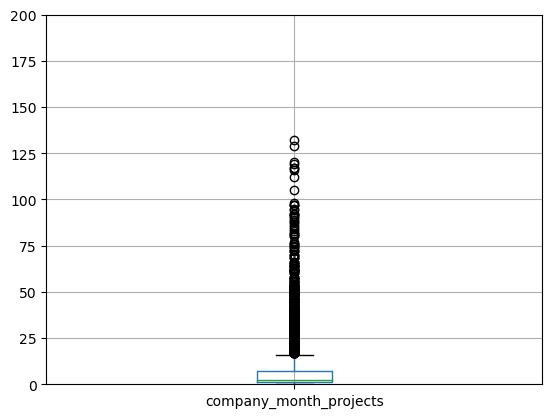

In [38]:
data.boxplot('company_month_projects')
plt.ylim(0, 200)
plt.show()

In [39]:
np.percentile(data['company_month_projects'], [90, 95, 99])

array([19.  , 32.05, 65.  ])

Не более 10% компаний выполняют в месяц более 19 проектов. Эти данные тоже лучше разбить на категории.

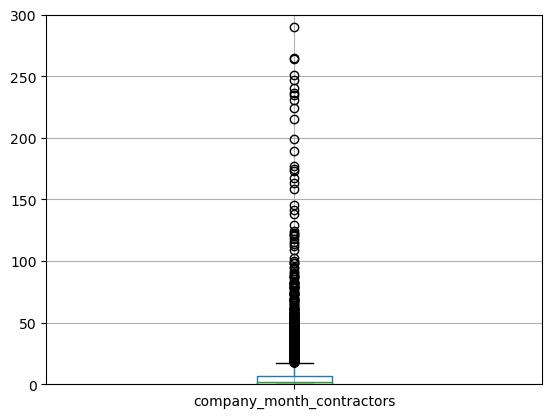

In [40]:
data.boxplot('company_month_contractors')
plt.ylim(0, 300)
plt.show()

In [41]:
np.percentile(data['company_month_contractors'], [90, 95, 99])

array([19., 32., 82.])

Не более чем у 10% компаний более 19 контрагентов в месяц.

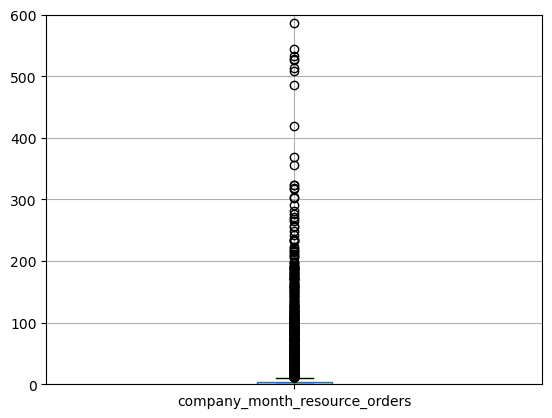

In [42]:
data.boxplot('company_month_resource_orders')
plt.ylim(0, 600)
plt.show()

In [43]:
np.percentile(data['company_month_resource_orders'], [90, 95, 99])

array([ 23.  ,  56.05, 183.22])

У менее, чем 1% компаний количество заказов превышает 183. При этом, судя по ID количества сотрудников, компании с более, чем 200 заказами в месяц, могут быть разного размера. Позже разобьем эти данные на категории.

Посмотрим на корреляцию оттока с другими числовыми признаками.

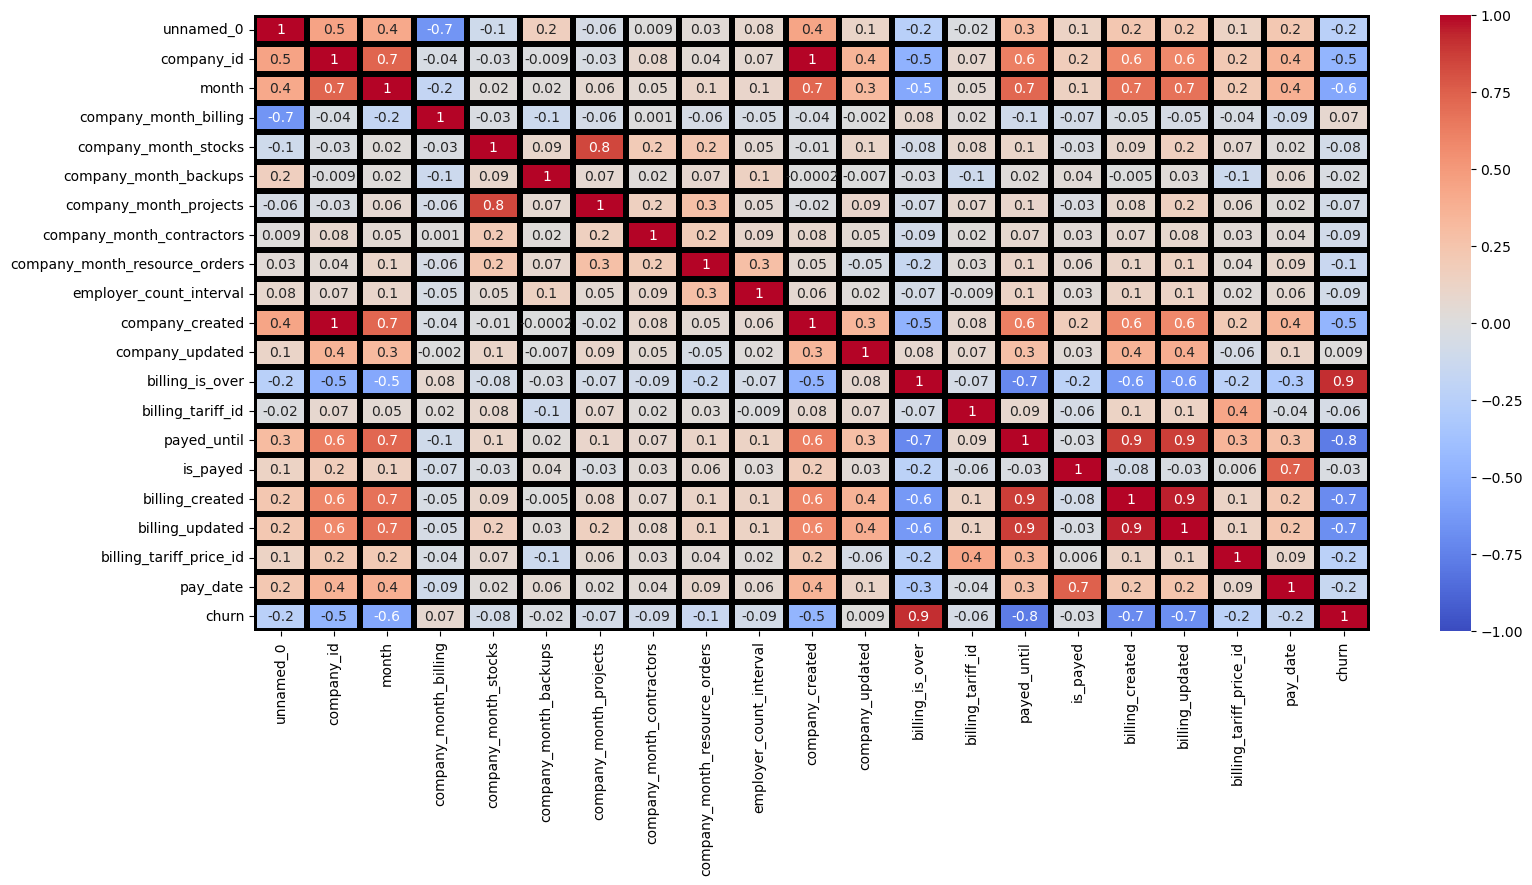

In [44]:
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black');

Из графика мы видим, что у параметра оттока практически отсутствует корреляция с числовыми признаками (не более 0.07). Среди них можно выделить параметры с наибольшим значением корреляции:
- `company_month_billing`  0.07

А также с отрицательной корреляцией:
- `billing_tariff_price_id`  -0.2
- `company_month_contractors` и `employer_count_interval`  -0.09
- `company_month_stocks`  -0.08
- `company_month_projects`  -0.07
- `billing_tariff_id`  -0.06

Для дальнейшего анализа разобьем некоторые числовые значения на категории.

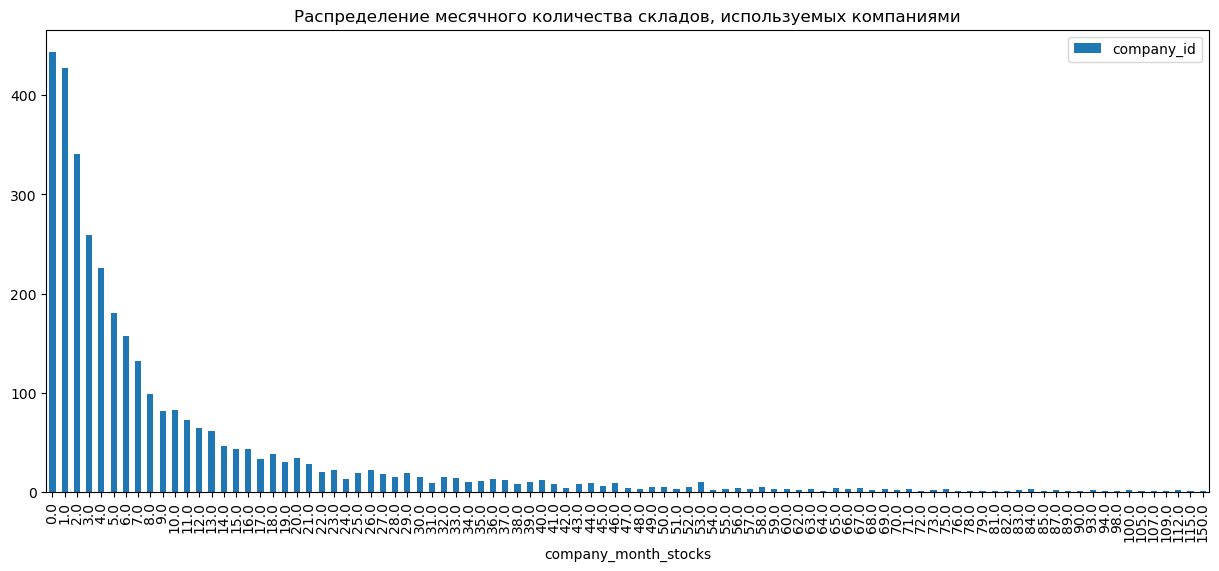

In [45]:
company_stocks = data.pivot_table(index='company_month_stocks', values='company_id', aggfunc = 'nunique').reset_index()
company_stocks.plot(x='company_month_stocks', y='company_id', kind='bar', figsize = (15,6), title='Распределение месячного количества складов, используемых компаниями');

Можно выделить следующие категории:
- 0-2 склада,
- 3-8 складов,
- более 8

In [46]:
def categorize_stocks(company_month_stocks):
    '''
    Эта функция выделяет категории количества используемых складов. 
    На вход принимает количество складов.
    '''
    try:
        if 0 <= company_month_stocks <= 2: 
            return 1
        elif 3 <= company_month_stocks <= 8: 
            return 2
        else:
            return 3
    except:
        pass

In [47]:
data['stocks_category'] = data['company_month_stocks'].apply(categorize_stocks)

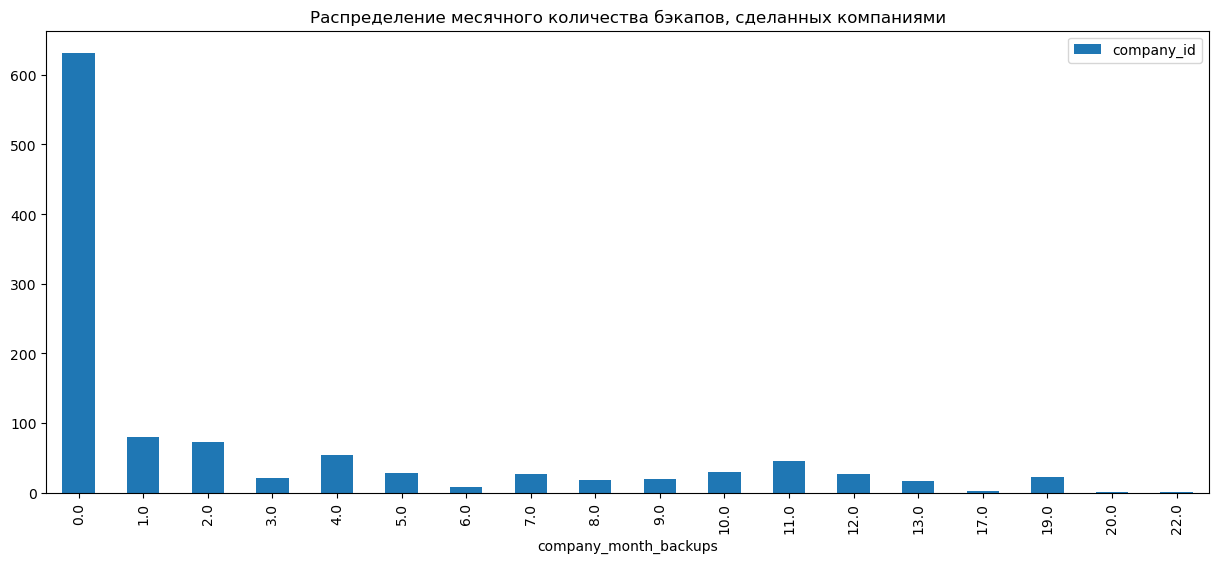

In [48]:
company_backups = data.pivot_table(index='company_month_backups', values='company_id', aggfunc = 'nunique').reset_index()
company_backups.plot(x='company_month_backups', y='company_id', kind='bar', figsize = (15,6), title='Распределение месячного количества бэкапов, сделанных компаниями');

Большинство компания не делает бэкапов, поэтому назначим категории:
- не делает - 0,
- делает - 1

In [49]:
def categorize_backups(company_month_backups):
    '''
    Эта функция выделяет категории количества бэкапов. 
    На вход принимает количество бэкапов.
    '''
    try:
        if company_month_backups == 0: 
            return 0
        else:
            return 1
    except:
        pass

In [50]:
data['backups_category'] = data['company_month_backups'].apply(categorize_backups)

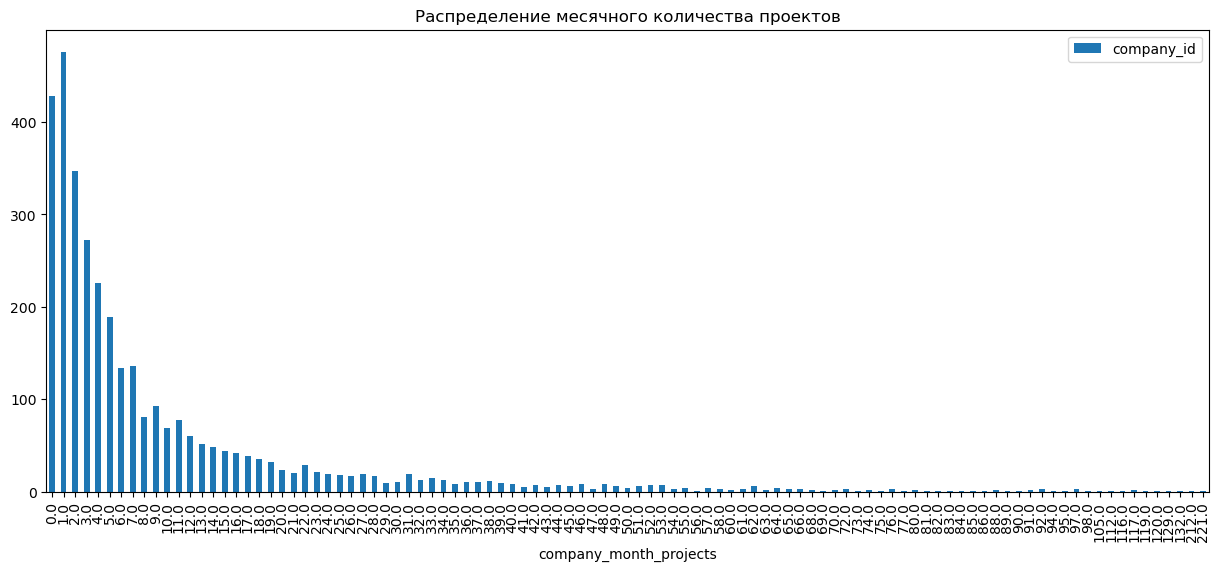

In [51]:
company_projects = data.pivot_table(index='company_month_projects', values='company_id', aggfunc = 'nunique').reset_index()
company_projects.plot(x='company_month_projects', y='company_id', kind='bar', figsize = (15,6), title='Распределение месячного количества проектов');

Можем выделить следующие категории:
- 0-1 проект,
- 2-7 проектов,
- более 8 проектов

In [52]:
def categorize_projects(company_month_projects):
    '''
    Эта функция выделяет категории количества выполненных проектов. 
    На вход принимает количество проектов.
    '''
    try:
        if 0 <= company_month_projects <= 1: 
            return 1
        elif 2 <= company_month_projects <= 7: 
            return 2
        else:
            return 3
    except:
        pass

In [53]:
data['projects_category'] = data['company_month_projects'].apply(categorize_projects)

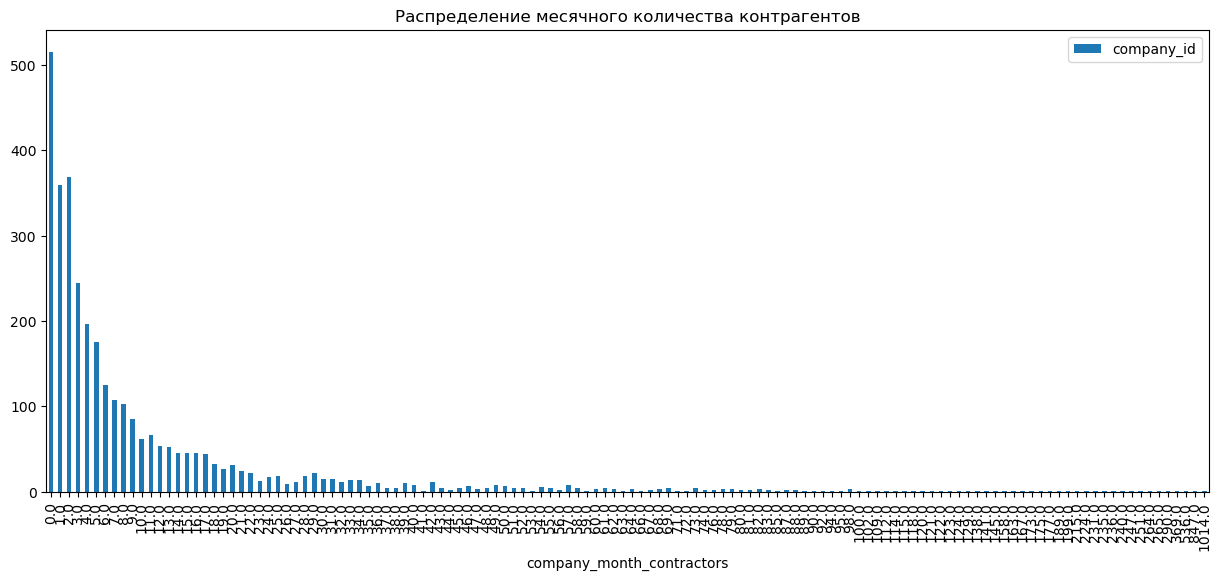

In [54]:
company_contractors = data.pivot_table(index='company_month_contractors', values='company_id', aggfunc = 'nunique').reset_index()
company_contractors.plot(x='company_month_contractors', y='company_id', kind='bar', figsize = (15,6), title='Распределение месячного количества контрагентов');

Можно выделить следующие категории:
- нет контрагентов,
- 1-7 контрагентов,
- 8 и более контрагентов

In [55]:
def categorize_contractors(company_month_contractors):
    '''
    Эта функция выделяет категории количества контрагентов. 
    На вход принимает количество контрагентов.
    '''
    try:
        if company_month_contractors == 0: 
            return 1
        elif 1 <= company_month_contractors <= 7: 
            return 2
        else:
            return 3
    except:
        pass

In [56]:
data['contractors_category'] = data['company_month_contractors'].apply(categorize_projects)

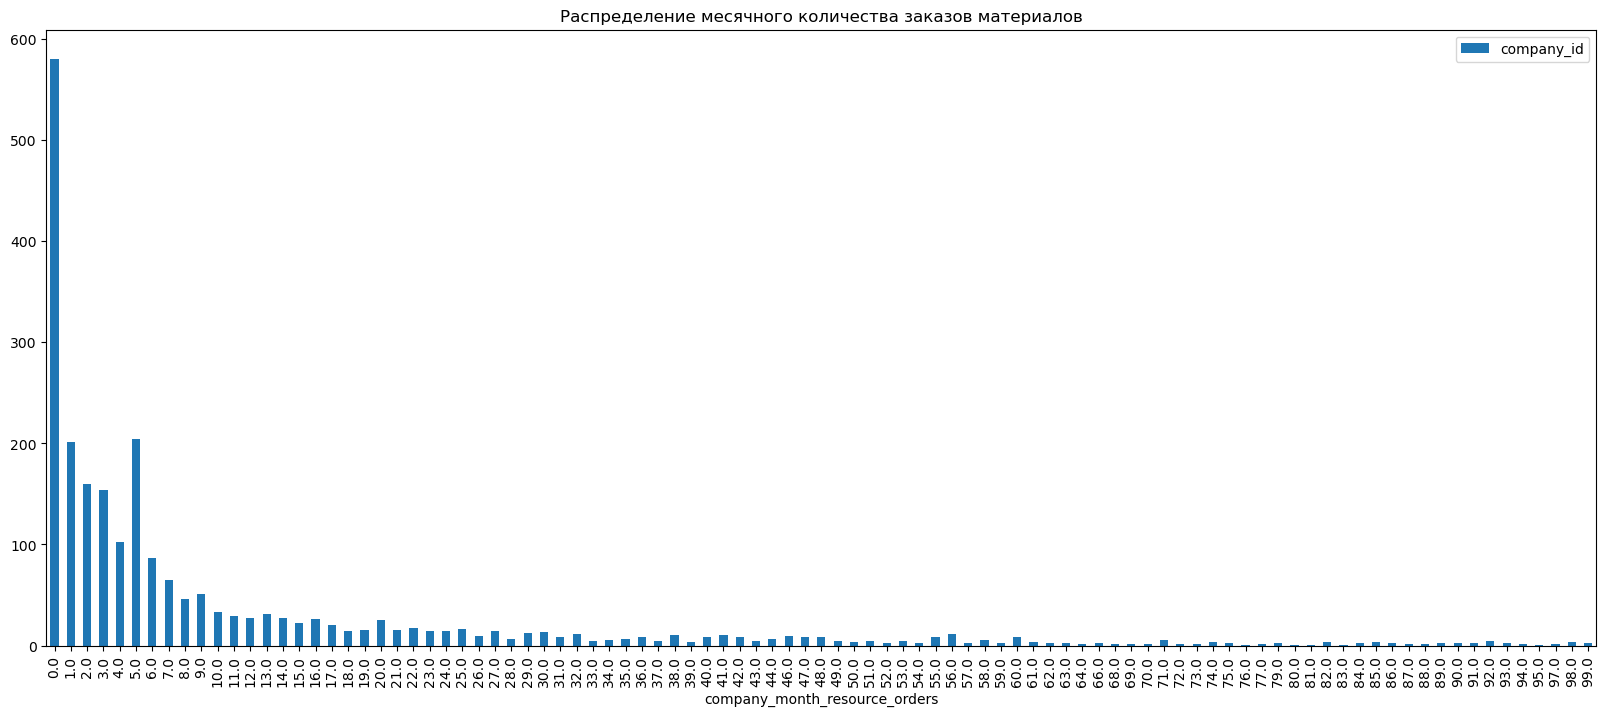

In [57]:
company_resource_orders = (
    data.query('company_month_resource_orders < 100')
    .pivot_table(index='company_month_resource_orders', values='company_id', aggfunc = 'nunique')
    .reset_index()
)
company_resource_orders.plot(x='company_month_resource_orders', y='company_id', kind='bar', figsize = (20,8), title='Распределение месячного количества заказов материалов');

Можем разбить на следующие категории:
- нет заказов,
- 1-5 заказов,
- более 6 заказов

In [58]:
def categorize_orders(company_month_resource_orders):
    '''
    Эта функция выделяет категории количества заказанных материалов. 
    На вход принимает количество материалов.
    '''
    try:
        if company_month_resource_orders == 0: 
            return 1
        elif 1 <= company_month_resource_orders <= 5: 
            return 2
        else:
            return 3
    except:
        pass

In [59]:
data['orders_category'] = data['company_month_resource_orders'].apply(categorize_orders)

Также разобьем на категории тарифы в сответствие с их группой.

Категории:
- Старт - 1
- Базовый - 2
- Бизнес - 3
- Профи - 4
- Архив - 5

In [60]:
start = [4, 7, 8, 11, 19]
base = [2, 17]
business = [9, 20]
pro = [3, 10, 13, 21]
archive = [6]

In [61]:
def categorize_tariff(billing_tariff_id):
    '''
    Эта функция выделяет категории тарифов. 
    На вход принимает ID тарифа.
    '''
    try:
        if billing_tariff_id in start: 
            return 1
        elif billing_tariff_id in base: 
            return 2
        elif billing_tariff_id in business: 
            return 3
        elif billing_tariff_id in pro: 
            return 4
        else:
            return 5
    except:
        pass

In [62]:
data['tariff_category'] = data['billing_tariff_id'].apply(categorize_tariff)

Таким образом, на этапе исследовательского анализа мы:
- Выделили целевую переменную.
- Объединили датасеты вместе с целевой переменной.
- Посмотрели распределение данных. Обнаружили выбросы.
- Посчитали корреляцию числовых признаков с целевой переменной. Значимой корреляции не обнаружили.
- Выделили ряд категориальных признаков для дальнешего анализа.

## Проверка гипотез и поиск признаков оттока

Посмотрим на наиболее массовую компанию-пользователя. Например, на количество сотрудников в компаниях.

In [63]:
def barplot_show(dataframe, x_axis, y_axis, my_title):
    '''
    Эта функция строит столбчатую диаграмму. На вход принимает датафрейм, значения по оси х и у, заголовок.
    '''
    dataframe.plot(x=x_axis, y=y_axis, kind='bar', title=my_title);

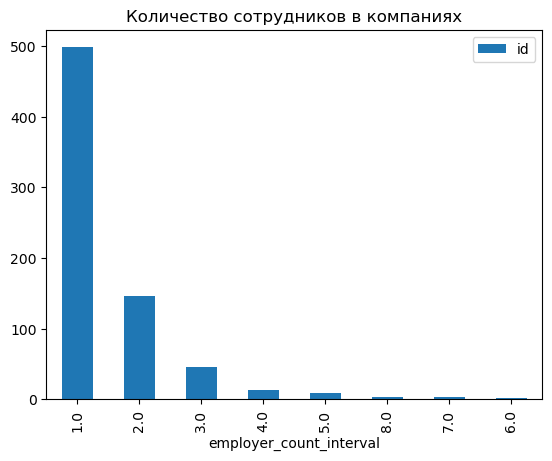

In [64]:
max_employer_count = (
    companies.pivot_table(index='employer_count_interval', values='id', aggfunc='nunique')
    .reset_index()
    .sort_values(by=['id'], ascending=False)
)
barplot_show(max_employer_count, 'employer_count_interval', 'id', 'Количество сотрудников в компаниях')

Больше всего компаний-пользователей с id 1 (1-4 сотрудника). Компаний, в которых более 20 сотрудников, очень немного. Посмотрим как давно компании пользуются сервисом.

In [65]:
time_of_use = billing.pivot_table(index='company_id', values=['created_at', 'updated_at'], aggfunc='min').reset_index()
time_of_use['month_count'] = ((today - time_of_use.created_at) / np.timedelta64(1, 'M')).astype(int)
time_of_use['month_count'].unique()

array([55, 20, 27, 49, 52, 29, 46, 39, 53, 44, 41, 47, 23, 50, 54, 51, 13,
       14, 19, 35, 45, 48, 25, 30, 21, 43, 28, 18, 40, 32, 34, 42, 33, 31,
       24, 22, 37,  7,  9,  4, 36, 38, 12, 17, 26, 11, 16,  1,  2,  5,  8,
        6, 15, 10,  3,  0])

Уберем компании, которые пользуются сервисом менее месяца.

In [66]:
time_of_use = time_of_use.query('month_count > 0')
time_of_use['year_count'] = (time_of_use['month_count'] / 12).astype(int)

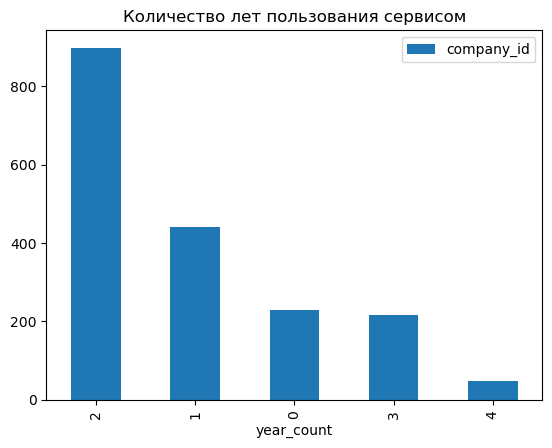

In [67]:
use_year_cnt = (
    time_of_use.pivot_table(index='year_count', values='company_id', aggfunc='nunique')
    .reset_index()
    .sort_values(by='company_id', ascending=False)
)
barplot_show(use_year_cnt, 'year_count', 'company_id', 'Количество лет пользования сервисом')

Большинство компаний пользуется сервисом 2 года. Посмотрим, насколько стабильно компании платят за подписку. Для начала подсчитаем как часто происходит оплата.

In [68]:
pay_date_notnull = billing.query('pay_date != "NaT"')

In [69]:
pay_date_notnull['payed_years_count'] = (pay_date_notnull['payed_until'].dt.year - pay_date_notnull['created_at'].dt.year).astype(int)
payed_years = pay_date_notnull.pivot_table(index='company_id', values='payed_years_count', aggfunc='sum').reset_index()

C:\Users\atash\AppData\Local\Temp\ipykernel_9672\3534837313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pay_date_notnull['payed_years_count'] = (pay_date_notnull['payed_until'].dt.year - pay_date_notnull['created_at'].dt.year).astype(int)


In [70]:
pay_ratio_cnt = time_of_use.merge(payed_years, how='inner', left_on='company_id', right_on='company_id')
pay_ratio_cnt = pay_ratio_cnt.query('year_count != 0')
pay_ratio_cnt['pay_ratio'] = (pay_ratio_cnt['payed_years_count'] / pay_ratio_cnt['year_count']).round(2)

In [71]:
pay_ratio_pivot = pay_ratio_cnt.pivot_table(index='pay_ratio', values='company_id', aggfunc='nunique').reset_index()

In [72]:
def categorize_pay(pay_ratio):
    '''
    Эта функция назначает значения регулярности оплаты за подписку. 
    На вход принимает частоту оплаты.
    '''
    try:
        if pay_ratio >= 1: 
            return 'Платит регулярно'
        elif 0 < pay_ratio < 1: 
            return 'Платит нерегулярно'
        else:
            return 'Не платит'
    except:
        pass

In [73]:
pay_ratio_cnt['pay_category'] = pay_ratio_cnt['pay_ratio'].apply(categorize_pay)

In [74]:
pay_ratio_cnt['pay_category'].unique()

array(['Платит нерегулярно', 'Платит регулярно', 'Не платит'],
      dtype=object)

In [75]:
pay_ratio_cnt.head()

,company_id,created_at,updated_at,month_count,year_count,payed_years_count,pay_ratio,pay_category
0,5,2019-07-26 10:43:37,2019-07-26 10:43:37,55,4,2,0.50,Платит нерегулярно
1,11,2022-06-30 16:35:50,2022-06-30 16:36:14,20,1,2,2.00,Платит регулярно
2,21,2020-01-26 18:22:11,2020-01-26 18:22:11,49,4,1,0.25,Платит нерегулярно
3,30,2019-10-17 12:04:59,2019-10-17 12:04:59,52,4,1,0.25,Платит нерегулярно
4,108,2020-04-27 11:53:51,2020-04-27 11:53:51,46,3,0,0.00,Не платит


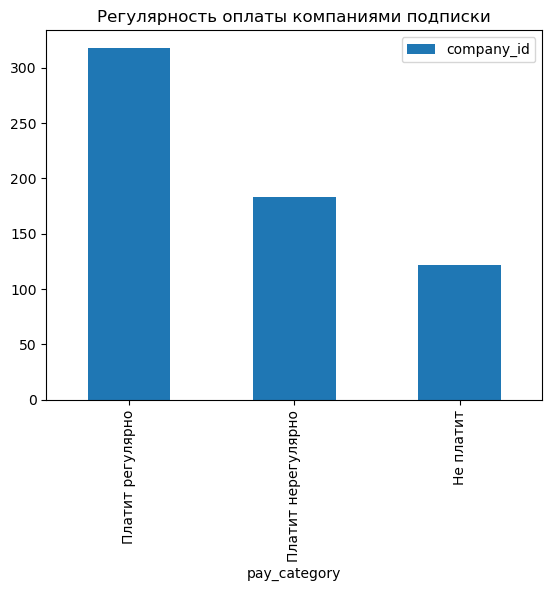

In [76]:
pay_ratio_cnt_pivot = (
    pay_ratio_cnt.pivot_table(index='pay_category', values='company_id', aggfunc='nunique')
    .reset_index()
    .sort_values(by='company_id', ascending=False)
)
barplot_show(pay_ratio_cnt_pivot, 'pay_category', 'company_id', 'Регулярность оплаты компаниями подписки')

Большинство компаний платит регулярно. Однако есть компании, которые совсем не платят. Посмотрим, как давно были последние активности по компаниям.

In [77]:
last_activity = activities.pivot_table(index='company_id', values='month', aggfunc='max').reset_index()
last_activity['days_cnt'] = (today - last_activity['month']).dt.days

In [78]:
last_activity['years_cnt'] = (last_activity['days_cnt'] / 365).astype(int)
last_activity['years_cnt'].unique()

array([4, 1, 3, 2, 0])

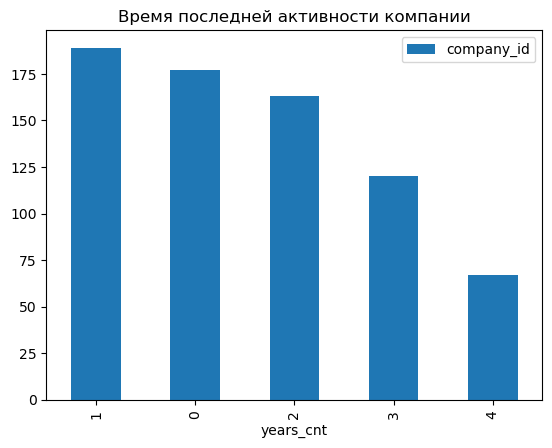

In [79]:
last_activity_pivot = (
    last_activity.pivot_table(index='years_cnt', values='company_id', aggfunc='nunique')
    .reset_index()
    .sort_values(by='company_id', ascending=False)
)
barplot_show(last_activity_pivot, 'years_cnt', 'company_id', 'Время последней активности компании')

У большинства компаний последняя активность была год назад. Однако у значительного числа компаний активность была менее года назад и два года назад.

Посмотрим какой группой тарифов пользуются компании.

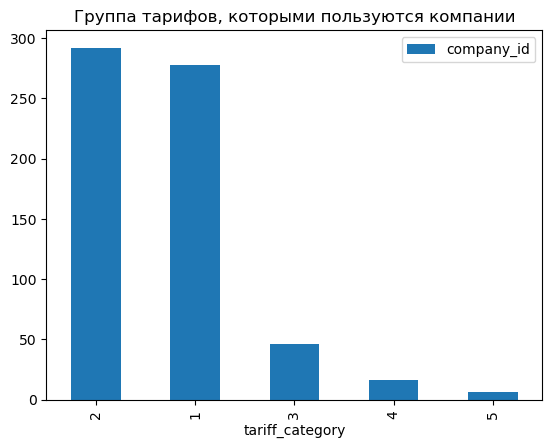

In [80]:
last_tariff = (
    data.pivot_table(index='tariff_category', values='company_id', aggfunc='nunique')
    .reset_index()
    .sort_values(by='company_id', ascending=False)
)
barplot_show(last_tariff, 'tariff_category', 'company_id', 'Группа тарифов, которыми пользуются компании')

Самые популярные группы тарифов это `старт` и `базовый`.

Таким образом, мы можем выделить следующий портрет наиболее массовой компании-пользователя:
- Небольшое количество сотрудников (1-4 человека).
- Пользуются сервисом 2 года.
- Регулярно платят за подписку.
- Последняя активность была год назад.
- Пользуется группами тарифов `старт` и `базовый`.

Вероятно небольшие компании более заинтересованы в использовании сервиса, так как из-за небольшого количества сотрудников им сложнее наладить управление бизнесом. Тарифы `старт` и `базовый` предполагают небольшое количество пользователей и стоят дешевле. Поскольку компании платят регулярно и пользуются около 2 лет, можно предположить, что базовый функционал их устраивает. Однако последняя активность большинства компаний была год назад. Возможно сервис оказался не настолько удобным, чтобы регулярно им пользоваться. 

Посмотрим на эти признаки в разрезе оттока.

In [81]:
def show_values_on_bars(axs):
    '''
    Это готовая функция из интернета для того, чтобы отобразить значения на графиках.
    '''
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [82]:
def barplot_show_2(x_axis, y_axis, df, hue_column, title, x_label, y_label):
    '''
    Эта функция строит столбчатую диаграмму. Принимает на вход значение по осям х и у, датафрейм, заголовок, подписи к осям.
    '''
    sns.set_style('dark')
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=x_axis, y=y_axis, data=df, hue=hue_column)
    show_values_on_bars(ax)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid()
    plt.show() 

posx and posy should be finite values
posx and posy should be finite values


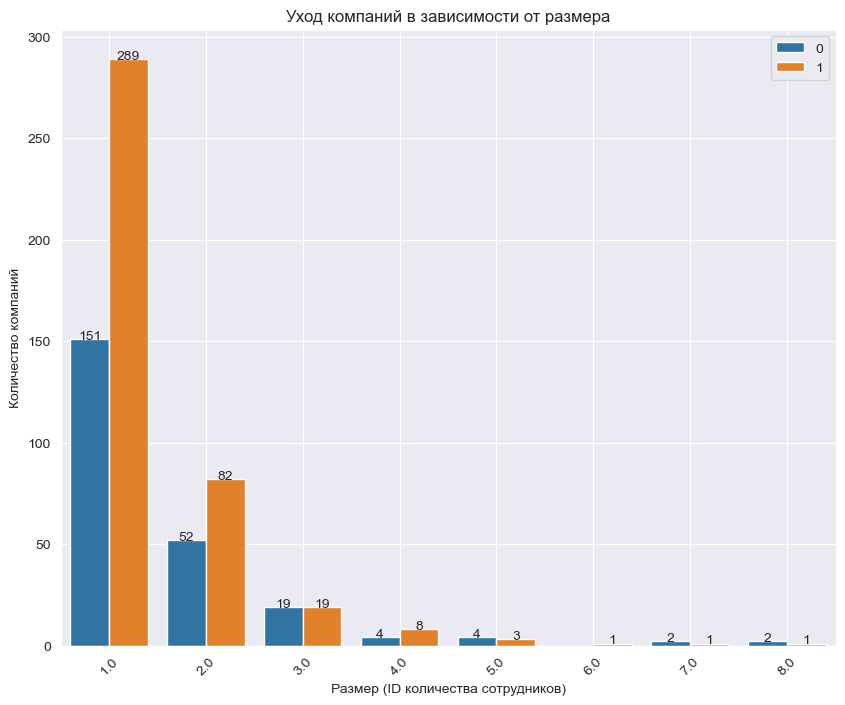

In [83]:
employer_count_churn = data.groupby(['employer_count_interval', 'churn'], as_index = False)[['company_id']].nunique()
employer_count_churn.columns = ['employer_count_interval', 'churn', 'count']
barplot_show_2('employer_count_interval', 'count', employer_count_churn, 'churn', 'Уход компаний в зависимости от размера', 'Размер (ID количества сотрудников)', 'Количество компаний')

In [84]:
print(f"Коэффициент корреляции между размером компании и оттоком: {data['employer_count_interval'].corr(data['churn'])}")

Коэффициент корреляции между размером компании и оттоком: -0.08517580609606692


Большинство ушедших компаний, как и большинство оставшихся, это небольшие компании (1-4 сотрудника). Однако ушедших больше. Можно сказать, что размер компании не влияет на отток. Коэффициент корреляции также показывает, что размер компании на отток не влияет.

Посмотрим с каких групп тарифов уходят чаще.

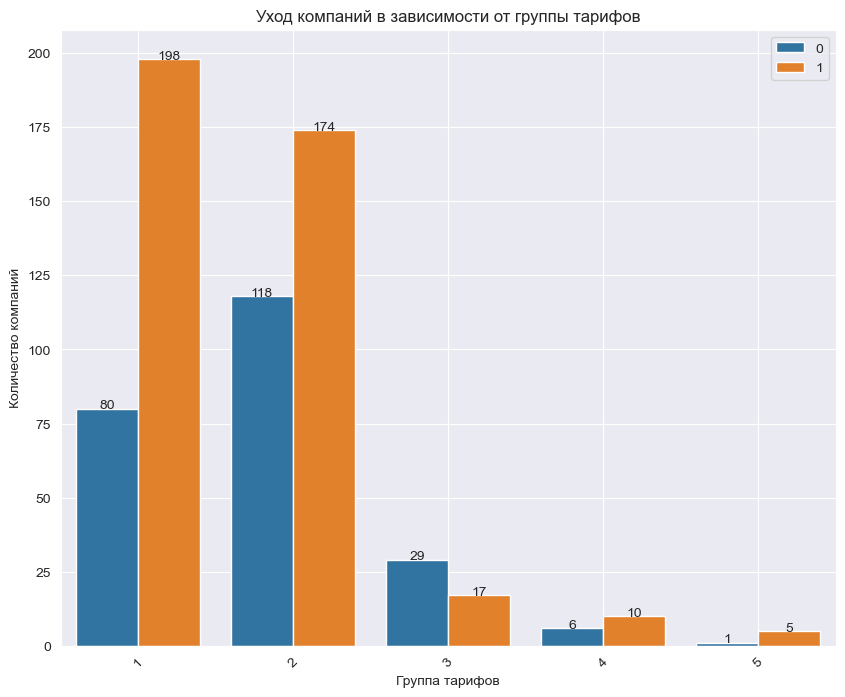

In [85]:
tariff_churn = data.groupby(['tariff_category', 'churn'], as_index = False)[['company_id']].nunique()
tariff_churn.columns = ['tariff_category', 'churn', 'count']
barplot_show_2('tariff_category', 'count', tariff_churn, 'churn', 'Уход компаний в зависимости от группы тарифов', 'Группа тарифов', 'Количество компаний')

In [86]:
print(f"Коэффициент корреляции между группой тарифов и оттоком: {data['tariff_category'].corr(data['churn'])}")

Коэффициент корреляции между группой тарифов и оттоком: -0.12875473205330815


Большинство ушедших компаний пользовались стартовыми тарифами. Большинство оставшихся пользуются базовыми тарифами. Можно предположить, что попользовавшись некоторое время стартовыми тарифами, пользователи понимают, что сервис им не подходит. Коэффициент корреляции говорит о том, что между этими параметрами есть очень слабая отрицательная кореляция. То есть чем более профессиональным тарифом пользуется компания, тем меньше отток.

Посмотрим как изменялись тарифы с течением времени.

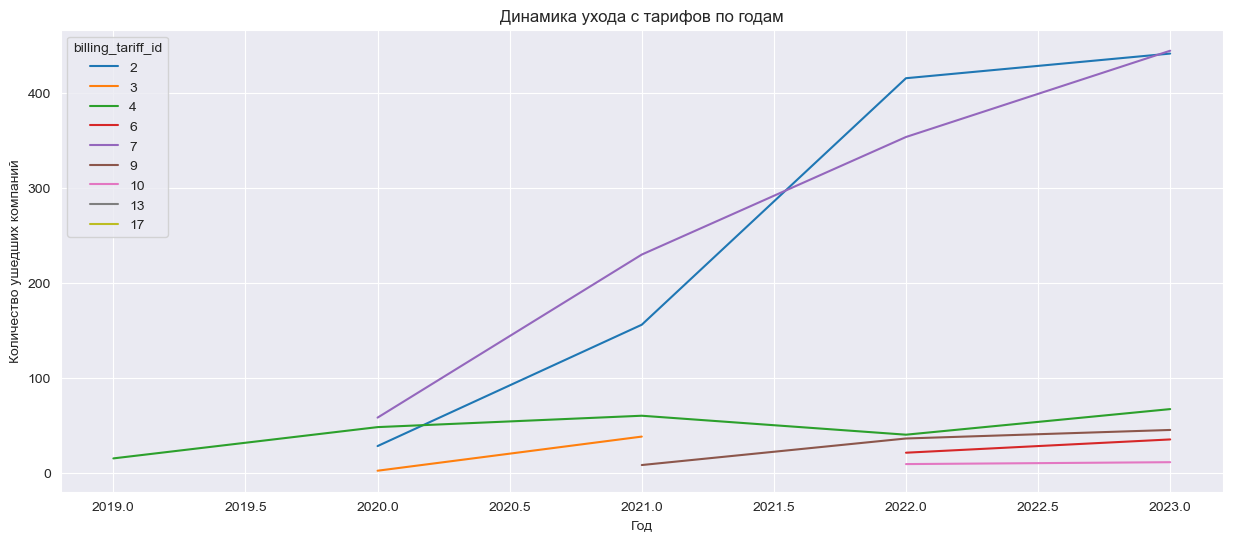

In [87]:
data['last_payed_year'] = data['payed_until'].dt.year
churn_from_tariff = (
    data.query('last_payed_year < 2024')
    .pivot_table(index='last_payed_year', columns='billing_tariff_id', values='churn', aggfunc='sum')
    .plot(grid=True, figsize=(15, 6))
)
plt.title('Динамика ухода с тарифов по годам')
plt.xlabel('Год')
plt.ylabel('Количество ушедших компаний')
plt.show()

С момента появления тарифов 2 и 7 (группы базовый и старт соответственно) и до 2023 года включительно с них постепенно увеличивался отток пользователей. Самый долгоиграющий тариф 4 также относится к группе стартовых, однако с этого тарифа отток примерно одинаковый за весь период. Тарифы 6 и 10 (архивный и профи соответственно) самые молодые, однако отток с этих тарифов за 2022 год был примерно на одном уровне.

Посмотрим влияет ли изменение цены одного и того же тарифа на отток.

In [88]:
print(f"Коэффициент корреляции между ID стоимости тарифа и оттоком: {data['billing_tariff_price_id'].corr(data['churn'])}")

Коэффициент корреляции между ID стоимости тарифа и оттоком: -0.23381285004215355


Коэффициент корреляции -0.2 говорит о наличии слабой отрицательной связи между ID стоимости тарифа и оттоком. То есть чем больше ID стоимости тарифа, тем меньше отток.

Посмотрим на активности компаний в разрезе оттока.

posx and posy should be finite values
posx and posy should be finite values


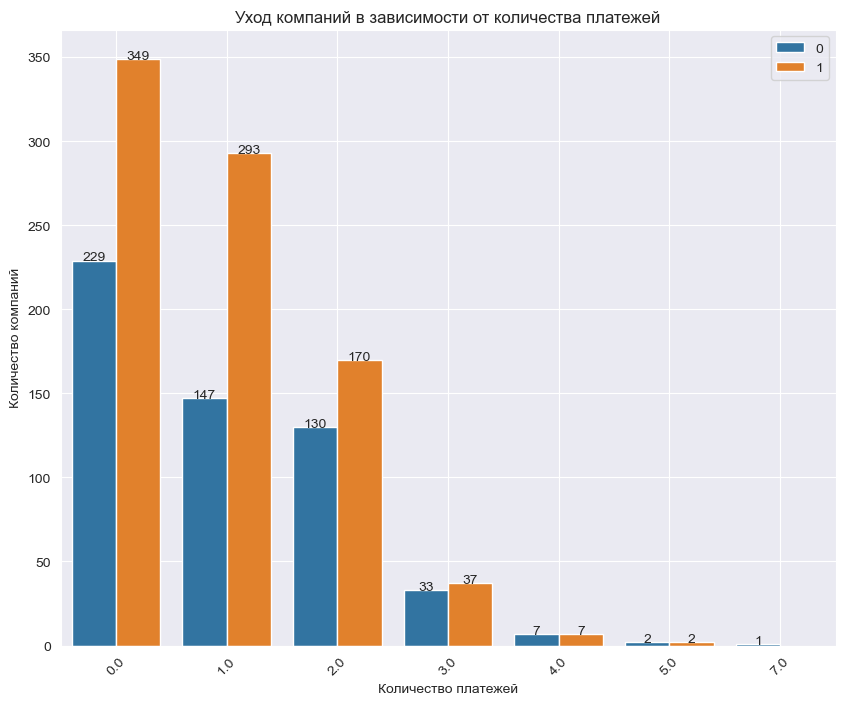

In [89]:
billing_churn = data.groupby(['company_month_billing', 'churn'], as_index = False)[['company_id']].nunique()
billing_churn.columns = ['company_month_billing', 'churn', 'count']
barplot_show_2('company_month_billing', 'count', billing_churn, 'churn', 'Уход компаний в зависимости от количества платежей', 'Количество платежей', 'Количество компаний')

In [90]:
print(f"Коэффициент корреляции между количеством платежей и оттоком: {data['company_month_billing'].corr(data['churn'])}")

Коэффициент корреляции между количеством платежей и оттоком: 0.0737750303684586


Большинство как ушедших, так и продливших подписку компаний, не совершали платежей. Коэффициент корреляции также показывает, что количество платежей, совершаемых ежемесячно, не влияет на отток.

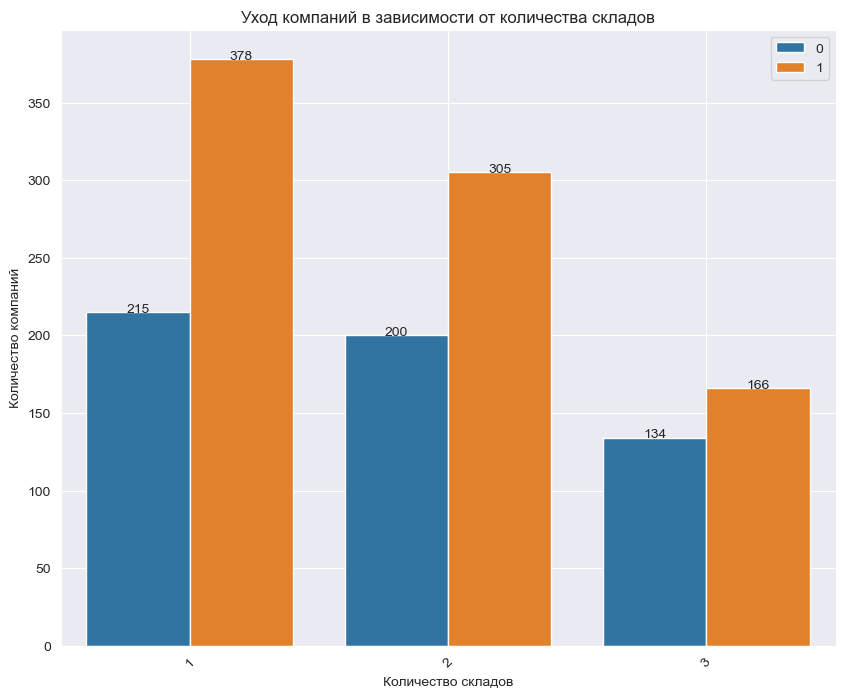

In [91]:
stocks_churn = data.groupby(['stocks_category', 'churn'], as_index = False)[['company_id']].nunique()
stocks_churn.columns = ['stocks_category', 'churn', 'count']
barplot_show_2('stocks_category', 'count', stocks_churn, 'churn', 'Уход компаний в зависимости от количества складов', 'Количество складов', 'Количество компаний')

In [92]:
print(f"Коэффициент корреляции между количеством складов и оттоком: {data['stocks_category'].corr(data['churn'])}")

Коэффициент корреляции между количеством складов и оттоком: -0.07834843512114258


Большинство как ушедших, так и продливших подписку компаний, используют не более 2 складов в месяц. Коэффициент корреляции показывает, что количество используемых складов не влияет на отток.

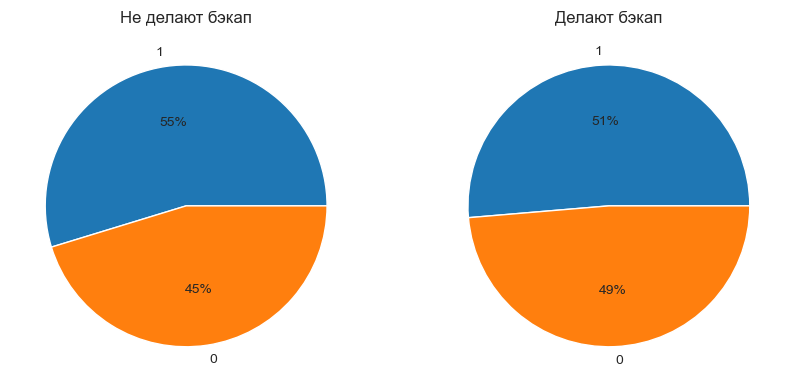

In [93]:
labls = data['churn'].unique()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(data.loc[data['backups_category'] == 0]['churn'].value_counts(), labels=labls, autopct='%.0f%%')
axes[0].set_title('Не делают бэкап')
axes[1].pie(data.loc[data['backups_category'] == 1]['churn'].value_counts(), labels=labls, autopct='%.0f%%')
axes[1].set_title('Делают бэкап')
plt.show()

Как видно из графика, количество бэкапов не оказывает влияния на отток.

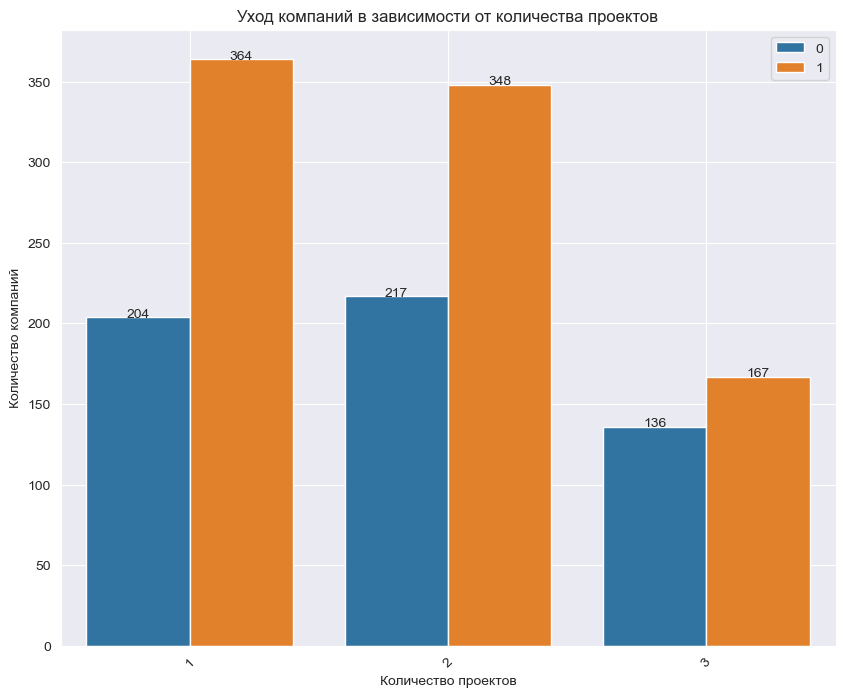

In [94]:
projects_churn = data.groupby(['projects_category', 'churn'], as_index = False)[['company_id']].nunique()
projects_churn.columns = ['projects_category', 'churn', 'count']
barplot_show_2('projects_category', 'count', projects_churn, 'churn', 'Уход компаний в зависимости от количества проектов', 'Количество проектов', 'Количество компаний')

In [95]:
print(f"Коэффициент корреляции между количеством проектов и оттоком: {data['projects_category'].corr(data['churn'])}")

Коэффициент корреляции между количеством проектов и оттоком: -0.07022649796601448


Большинство ушедших компаний выполняли не более 1 проекта (или не выполняли вовсе). Количество проектов у компаний, продливших подписку, не более 7. И коэффициент корреляции говорит нам об отсутствии связи между этими параметрами.

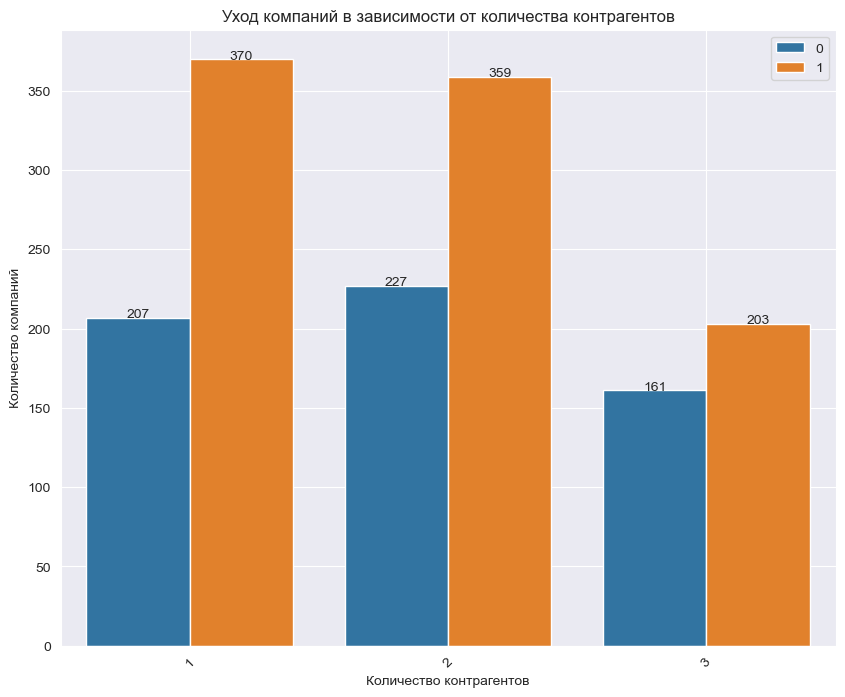

In [96]:
contractors_churn = data.groupby(['contractors_category', 'churn'], as_index = False)[['company_id']].nunique()
contractors_churn.columns = ['contractors_category', 'churn', 'count']
barplot_show_2('contractors_category', 'count', contractors_churn, 'churn', 'Уход компаний в зависимости от количества контрагентов', 'Количество контрагентов', 'Количество компаний')

In [97]:
print(f"Коэффициент корреляции между количеством контрагентов и оттоком: {data['contractors_category'].corr(data['churn'])}")

Коэффициент корреляции между количеством контрагентов и оттоком: -0.09787224923689183


У примерно равного количества ушедших компаний либо совсем не было контрагентов, либо было от 1 до 7, также как и у оставшихся. Судя по коэффициенту корреляции количество контрагентов не влияет на отток.

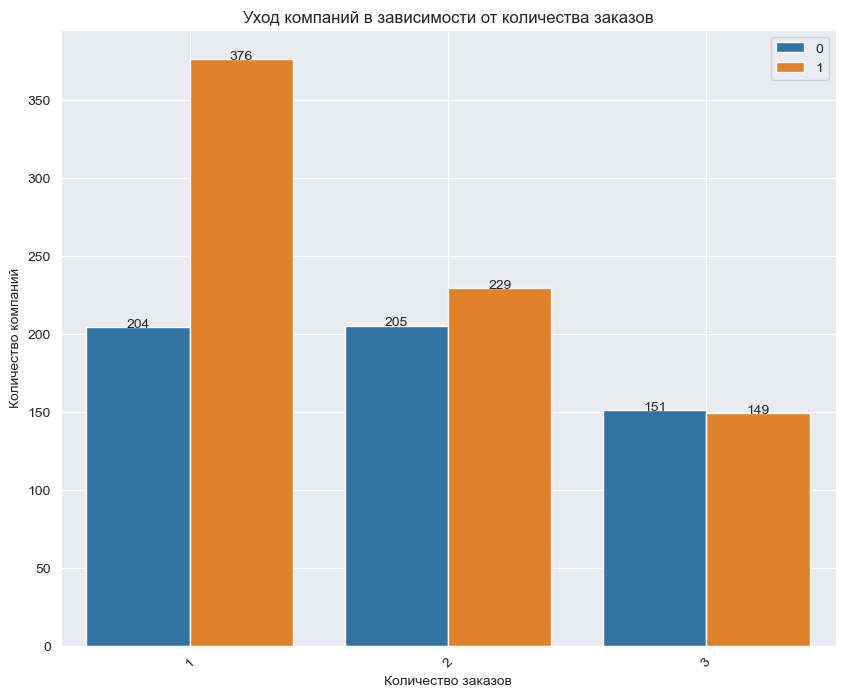

In [98]:
orders_churn = data.groupby(['orders_category', 'churn'], as_index = False)[['company_id']].nunique()
orders_churn.columns = ['orders_category', 'churn', 'count']
barplot_show_2('orders_category', 'count', orders_churn, 'churn', 'Уход компаний в зависимости от количества заказов', 'Количество заказов', 'Количество компаний')

In [99]:
print(f"Коэффициент корреляции между количеством заказов материалов и оттоком: {data['orders_category'].corr(data['churn'])}")

Коэффициент корреляции между количеством заказов материалов и оттоком: -0.1968627351660498


Большинство ушедших компаний не заказывало материалы. Примерно равное количество компаний, продливших подписку, либо также не заказывало материалы, либо число заказов не превышало 5. Коэффициент корреляции показывает очень слабую отрицательную корреляцию между этими параметрами. То есть чем больше количество заказанных материалов, тем меньше отток.

Таким образом, можно сказать, что активности напрямую не влияют на отток пользователей сервиса. Однако можно заметить, что с увеличением количества активностей уменьшается и отток.

Посмотрим одинаковую или разную активность проявляют компании на разных группах тарифов.

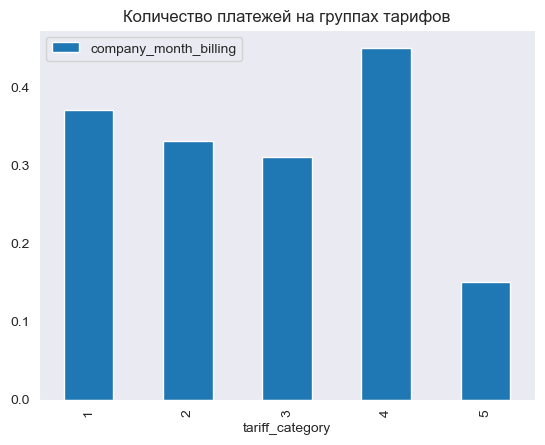

In [100]:
tariff_billing = data.pivot_table(index='tariff_category', values='company_month_billing', aggfunc='mean').reset_index()
tariff_billing['company_month_billing'] = (tariff_billing['company_month_billing']).round(2)
barplot_show(tariff_billing, 'tariff_category', 'company_month_billing', 'Количество платежей на группах тарифов')

Большинство платежей совершают на профи тарифах.

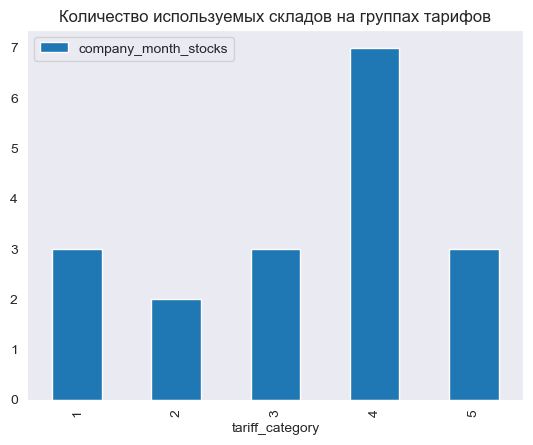

In [101]:
tariff_stocks = data.pivot_table(index='tariff_category', values='company_month_stocks', aggfunc='median').reset_index()
tariff_stocks['company_month_stocks'] = (tariff_stocks['company_month_stocks']).round(2)
barplot_show(tariff_stocks, 'tariff_category', 'company_month_stocks', 'Количество используемых складов на группах тарифов')

Наибольшее количество складов используют на профи тарифах.

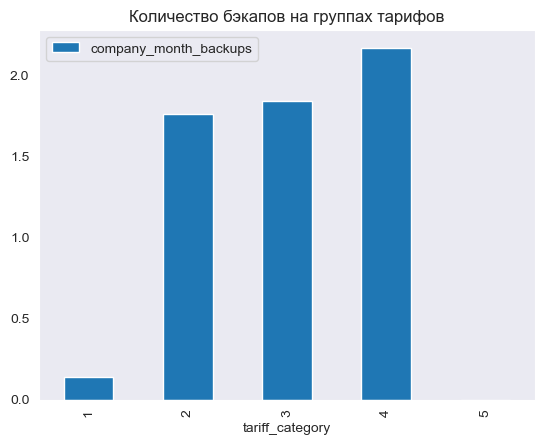

In [102]:
tariff_backups = data.pivot_table(index='tariff_category', values='company_month_backups', aggfunc='mean').reset_index()
tariff_backups['company_month_backups'] = (tariff_backups['company_month_backups']).round(2)
barplot_show(tariff_backups, 'tariff_category', 'company_month_backups', 'Количество бэкапов на группах тарифов')

Больше бэкапов делают пользователи профи тарифов.

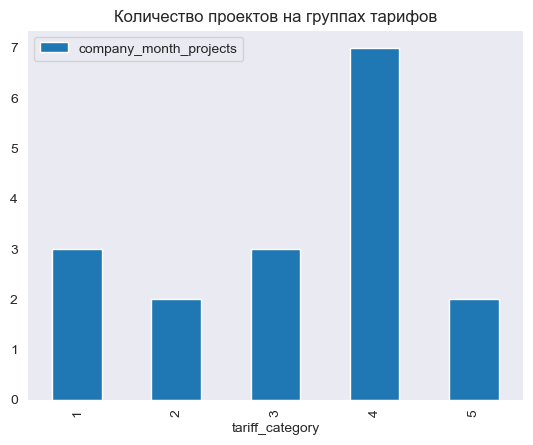

In [103]:
tariff_projects = data.pivot_table(index='tariff_category', values='company_month_projects', aggfunc='median').reset_index()
tariff_projects['company_month_projects'] = (tariff_projects['company_month_projects']).round(2)
barplot_show(tariff_projects, 'tariff_category', 'company_month_projects', 'Количество проектов на группах тарифов')

Большинство выполненных проектов у пользователей профи тарифов.

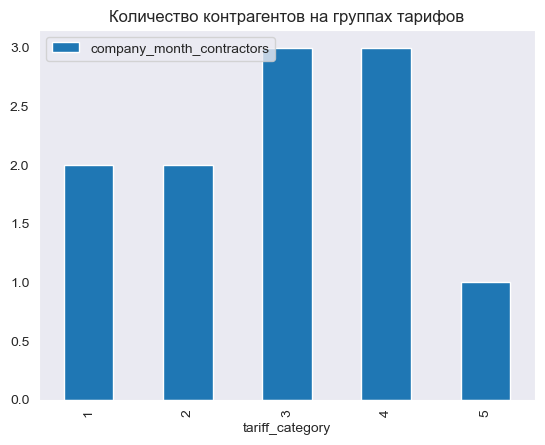

In [104]:
tariff_contractors = data.pivot_table(index='tariff_category', values='company_month_contractors', aggfunc='median').reset_index()
tariff_contractors['company_month_contractors'] = (tariff_contractors['company_month_contractors']).round(2)
barplot_show(tariff_contractors, 'tariff_category', 'company_month_contractors', 'Количество контрагентов на группах тарифов')

Большее количество контрагентов у пользователей бизнес и профи тарифов.

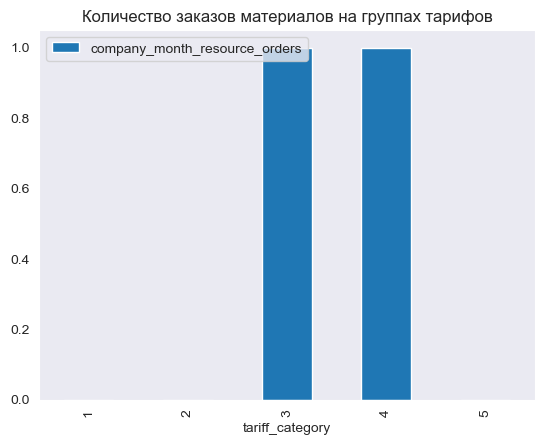

In [105]:
tariff_orders = data.pivot_table(index='tariff_category', values='company_month_resource_orders', aggfunc='median').reset_index()
tariff_orders['company_month_resource_orders'] = (tariff_orders['company_month_resource_orders']).round(2)
barplot_show(tariff_orders, 'tariff_category', 'company_month_resource_orders', 'Количество заказов материалов на группах тарифов')

Материалы заказывают компании, использующие бизнес и профи тарифы.

Таким образом, мы можем сказать, что наибольшую активность проявляют на тарифах в группах `профи` и `бизнес`. Вероятно это связано с тем, что компании, оплатившие самые дорогостоящие тарифы, стараются максимально использовать сервис. 

## Выводы

1. Проанализировав данные мы выделили следующий портрет наиболее массовой компании-пользователя:
- Небольшое количество сотрудников (1-4 человека).
- Пользуются сервисом 2 года.
- Регулярно платят за подписку.
- Последняя активность была год назад.
- Пользуется группами тарифов `старт` и `базовый`.

Вероятно небольшие компании более заинтересованы в использовании сервиса, так как из-за небольшого количества сотрудников им сложнее наладить управление бизнесом. Тарифы старт и базовый предполагают небольшое количество пользователей и стоят дешевле. Поскольку компании платят регулярно и пользуются около 2 лет, можно предположить, что базовый функционал их устраивает. Однако последняя активность большинства компаний была год назад. Возможно сервис оказался не настолько удобным, чтобы регулярно им пользоваться.

2. Рассмотрев эти признаки в разрезе оттока мы обнаружили, что:
- Большинство ушедших компаний, как и большинство оставшихся, это небольшие компании (1-4 сотрудника). 
- Большинство ушедших компаний пользовались стартовыми тарифами. Большинство оставшихся пользуются базовыми тарифами. Можно предположить, что попользовавшись некоторое время стартовыми тарифами, пользователи понимают, что сервис им не подходит.
- С момента появления тарифов 2 и 7 (группы базовый и старт соответственно) и до 2023 года включительно с них постепенно увеличивался отток пользователей. Самый долгоиграющий тариф 4 также относится к группе стартовых, однако с этого тарифа отток примерно одинаковый за весь период. Тарифы 6 и 10 (архивный и профи соответственно) самые молодые, однако отток с этих тарифов за 2022 год был примерно на одном уровне.
- Есть слабая связь между ID стоимости тарифа и оттоком. Чем больше ID стоимости тарифа, тем меньше отток.

3. Проанализировав активности в разрезе оттока, мы обнаружили, что:
- Большинство как ушедших, так и продливших подписку компаний, не совершали платежей. 
- Большинство как ушедших, так и продливших подписку компаний, используют не более 2 складов в месяц. 
- Количество сделанных бэкапов не влияет на отток.
- Большинство ушедших компаний выполняли не более 1 проекта (или не выполняли вовсе). Количество проектов у компаний, продливших подписку, не более 7.
- У примерно равного количества ушедших компаний либо совсем не было контрагентов, либо было от 1 до 7, также как и у оставшихся.
- Большинство ушедших компаний не заказывало материалы. Примерно равное количество компаний, продливших подписку, либо также не заказывало материалы, либо число заказов не превышало 5.

Таким образом, можно сказать, что ни одна из активностей напрямую не влияют на отток пользователей сервиса. Однако можно заметить, что с увеличением количества активностей уменьшается и отток.

4. Проанализировав активности на разных группах тарифов мы выяснили, что наибольшую активность проявляют на тарифах в группах профи и бизнес. Вероятно это связано с тем, что компании, оплатившие самые дорогостоящие тарифы, стараются максимально использовать сервис. Или функционал на этих группах тарифов наиболее полезен для бизнеса.

Таким образом, если компания пользуется только стартовыми или базовыми тарифами, а также у нее либо совсем отсутствуют активности, либо они минимальны, то такая компания со временем может уйти. Возможно, что на этих тарифах польза для бизнеса не так очевидна. Вероятно стоит активнее привлекать компании пользоваться более профессиональными тарифами, на таких тарифах у компаний больше активностей. Например, демонстрировать пользу расширенного функционала для бизнеса, а также предлагать компаниям скидки на переход с базовых тарифов на более продвинутые.

## Презентация
* [Презентация](https://disk.yandex.ru/i/_dqrqVHyiqqEyg)